16:24:39 - cmdstanpy - INFO - Chain [1] start processing
16:24:40 - cmdstanpy - INFO - Chain [1] done processing


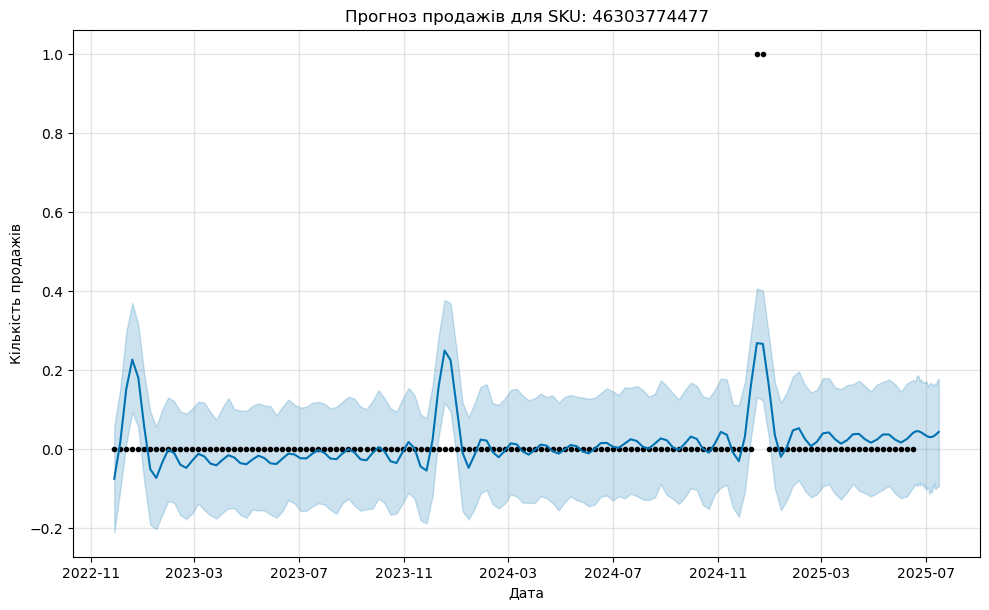

In [5]:
# 📦 1. Імпорт бібліотек
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
# 📂 2. Завантаження CSV-файлу
csv_path = "/Users/markiianyatsyshyn/Downloads/dataset_pcs - dataset_pcs.csv"
df = pd.read_csv(csv_path)
# 🧼 3. Попередня обробка
df['ds'] = pd.to_datetime(df['period'])  # Перетворюємо колонку з датою у формат datetime
df['y'] = df['qty_total']  # Колонка, яку будемо прогнозувати

# 📊 (Опціонально) Фільтруємо по одному SKU
sku_id_to_forecast = df['sku_id'].unique()[0]  # Беремо перший SKU у списку
df_sku = df[df['sku_id'] == sku_id_to_forecast]

# ⏳ 4. Створюємо і тренуємо модель
model = Prophet()
model.fit(df_sku[['ds', 'y']])

# 📅 5. Створення дат на 30 днів уперед
future = model.make_future_dataframe(periods=30)

# 🔮 6. Прогноз
forecast = model.predict(future)

# 💾 7. Збереження результату у CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(
    "/Users/markiianyatsyshyn/Downloads/sales_forecast.csv",
    index=False
)

# 📈 8. Побудова графіка
model.plot(forecast)
plt.title(f"Прогноз продажів для SKU: {sku_id_to_forecast}")
plt.xlabel("Дата")
plt.ylabel("Кількість продажів")
plt.show()
